<a href="https://colab.research.google.com/github/sarvan0506/AI/blob/Dev/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

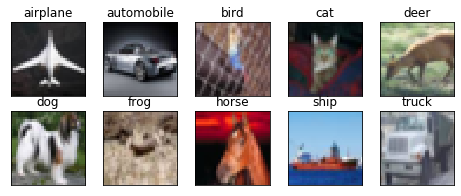

In [45]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [49]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':





Epoch 1/100





390/390 [==============================] - 29s 73ms/step - loss: 1.8634 - acc: 0.2859 - val_loss: 1.4656 - val_acc: 0.4561
Epoch 2/100
390/390 [==============================] - 21s 53ms/step - loss: 1.3440 - acc: 0.5132 - val_loss: 1.1699 - val_acc: 0.5820
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 1.1380 - acc: 0.5975 - val_loss: 0.9846 - val_acc: 0.6518
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 1.0024 - acc: 0.6497 - val_loss: 0.9063 - val_acc: 0.6797
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.9098 - acc: 0.6850 - val_loss: 0.8676 - val_acc: 0.7076
Epoch 6/100
390/390 [==============================] - 20s 52ms/step - loss: 0.8215 - acc: 0.7178 - val_loss: 0.7529 - val_acc: 0.7379
Epoch 7/100
390/390 [==============================] - 21s 54ms/step - loss: 0.7574 - acc: 0.7396 - val_loss: 0.6997 - val_acc: 0.7587
Epoch 8/100
390/390 [==========================

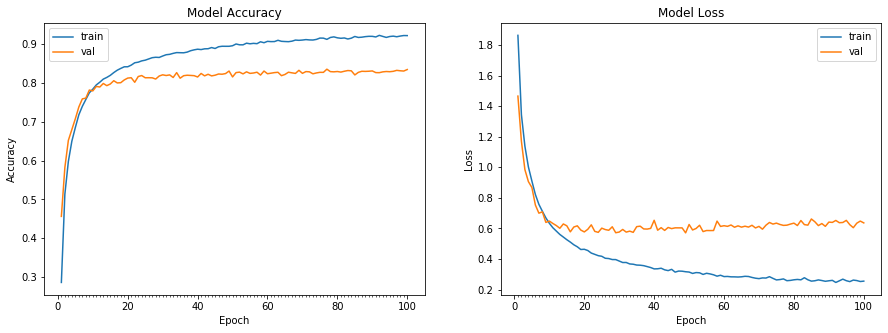

Accuracy on test data is: 83.43


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# 6A

In [55]:
# Define the model
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # output_channel_size - 32, RF - 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(ZeroPadding2D(padding=(3, 3)))
model.add(Convolution2D(64, 3, 3)) # output_channel_size - 36, RF - 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(MaxPooling2D(pool_size=(2, 2))) # output_channel_size - 18, RF - 6

'''
# BottleNeck Layer
model.add(Convolution2D(18, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
'''

model.add(Convolution2D(64, 3, 3, border_mode='same')) # output_channel_size - 18, RF - 10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(128, 3, 3, border_mode='same')) # output_channel_size - 18, RF - 14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(MaxPooling2D(pool_size=(2, 2))) # output_channel_size - 9, RF - 16
          

# BottleNeck Layer
model.add(Convolution2D(9, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
  

model.add(Convolution2D(64, 3, 3, border_mode='same')) # output_channel_size - 9, RF - 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(128, 3, 3, border_mode='same')) # output_channel_size - 9, RF - 32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))      
          
model.add(Convolution2D(256, 3, 3)) # output_channel_size - 7, RF - 40
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(7, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarni

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_163 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_188 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_164 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 36, 36, 64)        18496     
_________________________________________________________________
batch_normalization_164 (Bat (None, 36, 36, 64)       

In [0]:
import keras.backend as K
def loss_with_reg(model, batch_size, _lambda = 0.001):
  reg_loss_sqr = 0
  for layer in model.layers:
    if len(layer.get_weights()) > 0:
      reg_loss_sqr += np.sum(layer.get_weights()[0]**2)
  reg_loss_sqr = reg_loss_sqr * (_lambda/2*batch_size)
    
  def temp(y_true,y_pred):
    return K.categorical_crossentropy(y_true, y_pred)+reg_loss_sqr
  return temp

In [58]:
def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

batch_size=128

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
mcp_save = ModelCheckpoint('./mdl_wts.hdf5', save_best_only=True, monitor='val_acc', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.compile(loss=loss_with_reg(model,batch_size), optimizer=Adam(lr = 0.003), metrics=['accuracy'])

model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  


Epoch 1/100
390/390 [==============================] - 52s 133ms/step - loss: 82.1193 - acc: 0.4748 - val_loss: 81.9346 - val_acc: 0.5521
Epoch 2/100
390/390 [==============================] - 45s 115ms/step - loss: 81.7235 - acc: 0.6294 - val_loss: 82.1870 - val_acc: 0.5094
Epoch 3/100
390/390 [==============================] - 45s 114ms/step - loss: 81.5711 - acc: 0.6870 - val_loss: 81.6988 - val_acc: 0.6514
Epoch 4/100
390/390 [==============================] - 45s 115ms/step - loss: 81.4786 - acc: 0.7232 - val_loss: 81.6131 - val_acc: 0.6730
Epoch 5/100
390/390 [==============================] - 45s 114ms/step - loss: 81.4131 - acc: 0.7447 - val_loss: 81.6542 - val_acc: 0.6663
Epoch 6/100
390/390 [==============================] - 45s 115ms/step - loss: 81.3609 - acc: 0.7641 - val_loss: 81.4744 - val_acc: 0.7269
Epoch 7/100
390/390 [==============================] - 45s 115ms/step - loss: 81.3231 - acc: 0.7787 - val_loss: 81.4793 - val_acc: 0.7316
Epoch 8/100
390/390 [=============

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

#6B


In [0]:
from keras.layers import Activation, Conv2D, MaxPooling2D, Input, concatenate, BatchNormalization, Dropout, ZeroPadding2D, SeparableConv2D, Flatten
from keras.models import Model

In [52]:
input_img = Input(shape=(32, 32, 3))

# Normal Convolution

L1 = Convolution2D(48, 3, 3)(input_img) # output_channel_size - 30
L1 = BatchNormalization()(L1)
L1 = Activation('relu')(L1)
L1 = Dropout(0.1)(L1)

# Spatially Separable Convolution

L21 = Convolution2D(96, 3, 1)(L1) 
L21 = BatchNormalization()(L21)
L21 = Activation('relu')(L21)
L21 = Dropout(0.1)(L21)

L2 = Convolution2D(96, 1, 3)(L21) # output_channel_size - 28
L2 = BatchNormalization()(L2)
L2 = Activation('relu')(L2)
L2 = Dropout(0.1)(L2)

# Maxpooling

M1 = MaxPooling2D(pool_size=(2, 2))(L2) # output_channel_size - 14

# Bottleneck Layer

B1 = Convolution2D(15, 1, 1)(M1)
B1 = BatchNormalization()(B1)
B1 = Activation('relu')(B1)
B1 = Dropout(0.1)(B1)

# Depthwise Separable Convolution

L3 = SeparableConv2D(48, kernel_size=(3, 3))(B1) # output_channel_size - 12
L3 = BatchNormalization()(L3)
L3 = Activation('relu')(L3)
L3 = Dropout(0.1)(L3)

# Grouped Convolution I

L41 = Convolution2D(96, 3, 3, border_mode='same')(L3) # output_channel_size - 12
L41 = BatchNormalization()(L41)
L41 = Activation('relu')(L41)
L41 = Dropout(0.1)(L41)

L42 = Convolution2D(96, 5, 5, border_mode='same')(L3) # output_channel_size - 12
L42 = BatchNormalization()(L42)
L42 = Activation('relu')(L42)
L42 = Dropout(0.1)(L42)

L4 = concatenate([L41, L42], axis=-1)

# Maxpooling

M2 = MaxPooling2D(pool_size=(2, 2))(L4) # output_channel_size - 6

# Bottleneck Layer

B2 = Convolution2D(15, 1, 1)(M2)
B2 = BatchNormalization()(B2)
B2 = Activation('relu')(B2)
B2 = Dropout(0.1)(B2)

# Grouped Convolution II

L51 = Convolution2D(192, 3, 3, dilation_rate=1, border_mode='same')(B2) # output_channel_size - 6
L51 = BatchNormalization()(L51)
L51 = Activation('relu')(L51)
L51 = Dropout(0.1)(L51)


L52 = Convolution2D(192, 3, 3, dilation_rate=2, border_mode='same')(B2) # output_channel_size - 6
L52 = BatchNormalization()(L52)
L52 = Activation('relu')(L52)
L52 = Dropout(0.1)(L52)

L5 = concatenate([L51, L52], axis=-1)


L6 = Convolution2D(6, 1)(L5)
L6 = BatchNormalization()(L5)
L6 = Activation('relu')(L5)

L7 = Convolution2D(10, 6)(L6)

L8 = Flatten()(L7)

out = Activation('softmax')(L8)


model = Model(input_img, out)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 1))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (1, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (5, 5), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: User

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_157 (Conv2D)             (None, 30, 30, 48)   1344        input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_152 (BatchN (None, 30, 30, 48)   192         conv2d_157[0][0]                 
__________________________________________________________________________________________________
activation_176 (Activation)     (None, 30, 30, 48)   0           batch_normalization_152[0][0]    
___________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 53s 135ms/step - loss: 1.6880 - acc: 0.4359 - val_loss: 1.6793 - val_acc: 0.4243
Epoch 2/50
390/390 [==============================] - 49s 125ms/step - loss: 1.1559 - acc: 0.5900 - val_loss: 1.1341 - val_acc: 0.5998
Epoch 3/50
390/390 [==============================] - 49s 125ms/step - loss: 0.9396 - acc: 0.6679 - val_loss: 1.1373 - val_acc: 0.6168
Epoch 4/50
390/390 [==============================] - 49s 126ms/step - loss: 0.8340 - acc: 0.7037 - val_loss: 0.8671 - val_acc: 0.6921
Epoch 5/50
390/390 [==============================] - 49s 125ms/step - loss: 0.7606 - acc: 0.7323 - val_loss: 1.1219 - val_acc: 0.6094
Epoch 6/50
390/390 [==============================] - 49s 125ms/step - loss: 0.6937 - acc: 0.7553 - val_loss: 0.9631 - val_acc: 0.6600
Epoch 7/50
390/390 [==============================] - 49s 125ms/step - loss: 0.6533 - acc: 0.7701 - val_loss: 0.7375 - val_acc: 0.7385
Epoch 8/50
390/390 [==============================] - 4

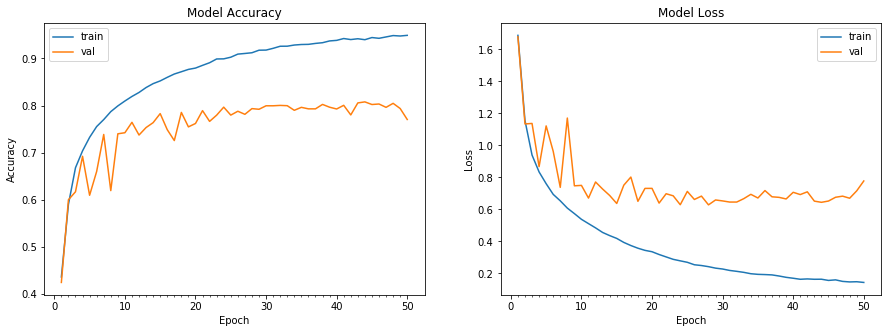

Accuracy on test data is: 77.03


In [54]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))